In [1]:
# ignore this cell (it's just to make certain text red later, but you don't need to understand it).
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

In [2]:
%matplotlib inline

In [3]:
# import statements
import sqlite3
import os

import pandas as pd
from pandas import DataFrame, Series

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 16

import math

import requests

## Bar plots using DataFrames

Bar Plot Example w/ Fire Hydrants

- General review of pandas
- Some new bar plot options

In [4]:
# TODO: read "Fire_Hydrants.csv" into a DataFrame
hdf = pd.read_csv("Fire_Hydrants.csv")
hdf.tail()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
10104,-89.439367,43.040481,286329,WUJAG,2018-08-13T18:03:33.000Z,WUJAG,2018-08-13T18:04:02.000Z,HYDR-3964-4053,TC,1-1830-19,...,NaN,WATEROUS,NaN,2018.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10105,-89.426303,43.067854,286330,WUJAG,2018-08-13T18:14:14.000Z,WUJAG,2018-08-13T18:17:45.000Z,HYDR-4253-4054,TC,1-1830-19,...,NaN,WATEROUS,NaN,2017.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10106,-89.445461,43.053305,286729,WUJAG,2018-08-15T16:37:18.000Z,WUJAG,2018-08-15T16:39:24.000Z,HYDR-3859-4055,TC,1-1830-19,...,NaN,WATEROUS,NaN,2000.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10107,-89.388849,43.068576,286730,WUJAG,2018-08-15T16:51:54.000Z,WUJAG,2018-08-15T16:59:15.000Z,HYDR-5052-4056,TC,1-1830-19,...,NaN,WATEROUS,NaN,2017.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10108,-89.518896,43.062062,287129,WUJAG,2018-08-20T18:54:01.000Z,WUJAG,2018-08-20T19:27:16.000Z,-2355-4057,FASB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRIVATE,NaN


In [5]:
# Extract just the column names
hdf.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### Let's create a *bar plot* to visualize *colors* of fire hydrants.

In [6]:
# Make a series called counts_series which stores the value counts of the "nozzle_color"
color_counts = hdf["nozzle_color"].value_counts()
color_counts # what is wrong with this data?

blue      5810
Blue      1148
Green      320
Orange      74
BLUE        45
green        9
Red          9
orange       4
GREEN        1
white        1
C            1
ORANGE       1
Name: nozzle_color, dtype: int64

In [7]:
# TODO: Clean the data ......use str.upper()

color_counts = hdf["nozzle_color"].str.upper().value_counts()
color_counts

BLUE      7003
GREEN      330
ORANGE      79
RED          9
WHITE        1
C            1
Name: nozzle_color, dtype: int64

Text(0.5, 0, 'Fire hydrant count')

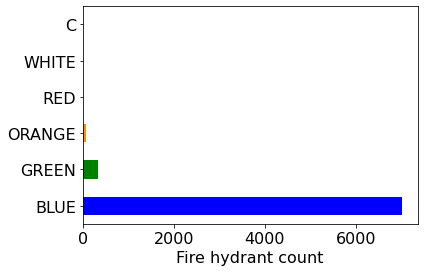

In [8]:
# Make a horizontal bar plot of counts of colors and have the colors match
# use color list: ["b", "g", "darkorange", "r", "c", "0.5"]
ax = color_counts.plot.barh(color = ["b", "g", "darkorange", "r", "c", "0.5"])
ax.set_xlabel("Fire hydrant count")

### Let's create a *bar plot* to visualize *style* of fire hydrants.

In [9]:
# Do the same thing as we did for the colors but this time for the "Style"
style_counts = hdf["Style"].str.upper().value_counts()
style_counts

PACER                      3620
M-3                        1251
MUELLER                    1243
WB-59                       664
K-11                        351
K-81                        162
W-59                        151
CLOW 2500                   123
CLOW MEDALLION               70
CLOW                         50
CENTURIAN                    35
EDDY                         27
MUELLER 90                   13
MUELLER 86                   13
MUELLER SUPER CENTURIAN      12
MUELLER 92                   12
MUELLER 93                   11
MUELLER 91                    9
MUELLER 89                    9
MUELLER CENTURIAN             9
MUELLER 85                    8
MUELLER 87                    7
MUELLER 84                    6
M-2                           6
SUPER CENTURIAN               6
M-1                           5
MUELLER 83                    4
MEDALLION                     4
PACER 1996                    3
SUPER CENTURION               3
K-10                          3
PACER 90

<AxesSubplot:>

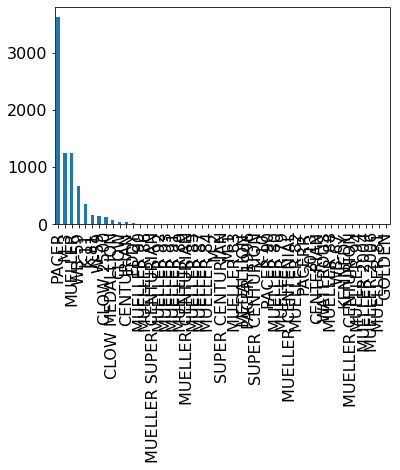

In [10]:
style_counts.plot.bar()

In [11]:
# Grab the top 12 
top12 = style_counts.iloc[:12]

# and them add an index to our Series for the sum of all the "other" for 
top12["other"] = style_counts.iloc[12:].sum()

Text(0.5, 0, 'Hydrant Type')

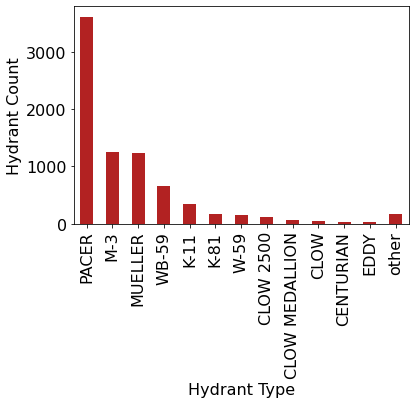

In [12]:
# Plot the results
ax = top12.plot.bar(color = "firebrick")
ax.set_ylabel("Hydrant Count")
ax.set_xlabel("Hydrant Type")

### In what *decade* were *pacers manufactured*?
### Take a peek at the *Style* column data

In [13]:
hdf["Style"]

0        Pacer
1        Pacer
2        Pacer
3        Pacer
4        Pacer
         ...  
10104      NaN
10105      NaN
10106      NaN
10107      NaN
10108      NaN
Name: Style, Length: 10109, dtype: object

### Which *column* gives *year* information?

In [14]:
hdf.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### How to get the *year_manufactured* for *pacers* and *others*?

In [15]:
# Let's get the year manufactured for all of the "Pacer" hydrants.
pacer_years = hdf[hdf["Style"] == "Pacer"]["year_manufactured"]

# Note: We can do this either way
# pacer_years = hdf["year_manufactured"][hdf["Style"] == "Pacer"]

pacer_years

0        1996.0
1        1995.0
2        1996.0
3        1995.0
4        1996.0
          ...  
10050    2017.0
10051    2017.0
10052    2017.0
10053    2017.0
10054       NaN
Name: year_manufactured, Length: 3458, dtype: float64

In [16]:
# then do the same for all the other data
other_years = hdf["year_manufactured"][hdf["Style"] != "Pacer"]
other_years

18       1987.0
22       1996.0
23       1996.0
71       1987.0
72       1987.0
          ...  
10104    2018.0
10105    2017.0
10106    2000.0
10107    2017.0
10108       NaN
Name: year_manufactured, Length: 6651, dtype: float64

### How to get the *decade* for *pacers*?

In [17]:
# Round each year down to the start of the decade.
# e.g. 1987 --> 1980, 2003 --> 2000
pacer_decades = (pacer_years // 10 * 10)
pacer_decades

0        1990.0
1        1990.0
2        1990.0
3        1990.0
4        1990.0
          ...  
10050    2010.0
10051    2010.0
10052    2010.0
10053    2010.0
10054       NaN
Name: year_manufactured, Length: 3458, dtype: float64

### How to convert the *decades* back to *int*?
- `astype(...)` method
- `dropna(...)` method

In [18]:
# Drop the NaN values, convert to int, and do value counts
pacer_decades = pacer_decades.dropna()
pacer_decades = pacer_decades.astype(int).value_counts()
pacer_decades

2000    1730
1990     846
2010     503
1980      21
1960       1
Name: year_manufactured, dtype: int64

### How to *count the decades* for pacers?

In [19]:
pacer_decades_count = pacer_decades.value_counts()
pacer_decades_count

1730    1
846     1
503     1
21      1
1       1
Name: year_manufactured, dtype: int64

### Count the *decades* for others.

In [20]:
# Do the same thing for other_years. Save to a variable called "other_decades"
other_decades = (other_years // 10 * 10).dropna().astype(int)
other_decades_count = other_decades.value_counts()
other_decades_count

2010    1196
1980     937
1970     578
1990     431
1950     371
1960     349
2000     215
1940      68
1930       9
1900       1
Name: year_manufactured, dtype: int64

### Build a DataFrame from a dictionary of key, Series

In [21]:
plot_df = DataFrame({
    "pacer": pacer_decades_count,
    "other": other_decades_count,
})
plot_df # observe the NaN values

,pacer,other
1,1.0,NaN
21,1.0,NaN
503,1.0,NaN
846,1.0,NaN
1730,1.0,NaN
1900,NaN,1.0
1930,NaN,9.0
1940,NaN,68.0
1950,NaN,371.0
1960,NaN,349.0


Text(0, 0.5, 'Hydrant Count')

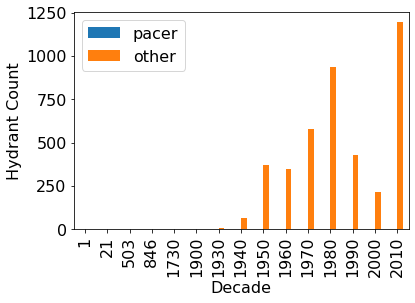

In [22]:
# make a bar plot

ax = plot_df.plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

#### Ignore data from before 1950 using boolean indexing.

Text(0, 0.5, 'Hydrant Count')

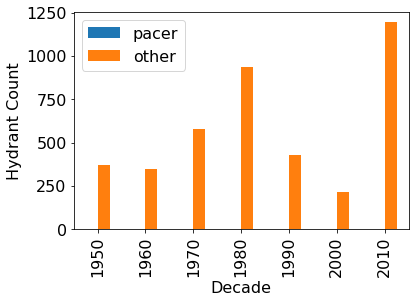

In [23]:
ax = plot_df[plot_df.index >= 1950].plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

### Stacked Bar Chart
`stacked` parameter accepts boolean value as argument

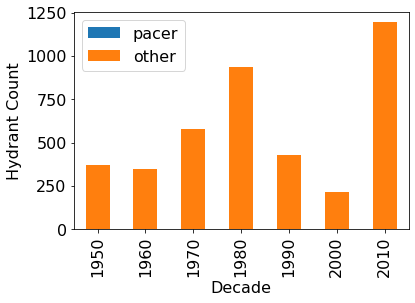

In [24]:
ax = plot_df[plot_df.index >= 1950].plot.bar(stacked=True)
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")
None

# Plotting 4

## Learning objectives
- how to use logarithmic axes
- how to create multiple plots within same figure

### Logarithmic scale
- math.log(y, base)
- find an x, such that 10**x == y
    - math.log10(y)

In [25]:
print(math.log10(1000))
print(math.log10(1000000))

3.0
6.0


In [26]:
print(math.log(32, 2))
print(math.log(256, 4))

5.0
4.0


In [27]:
def log_approx(y):
    assert type(y) == int
    assert y >= 1
    return len(str(y))

In [28]:
print(log_approx(123456789)) # What will this output?
print(math.log10(123456789))

9
8.09151497716927


In [29]:
print(log_approx(989898))
print(math.log10(989898))

6
5.995590446800246


In [30]:
errors = []
for y in range(1, 1000001):
    err = abs(log_approx(y) - math.log10(y))
    errors.append(err)
max(errors)

1.0

### Why does this matter?
- Comparing two numbers:
     - 134234255623423423423432423432432432
     - 2342343252523

- Eventually I don't care what the number is, but only counting the number of digits in the number to know how big the number is!
- log base 2: counting how many bits we need
- log base 10: 10 digits 0 through 9!

<AxesSubplot:>

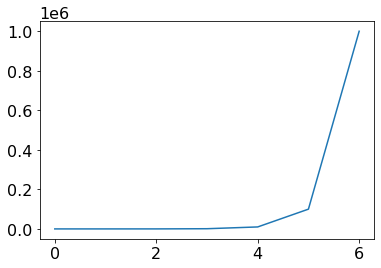

In [31]:
s = Series([1, 10, 100, 1000, 10000, 100000, 1000000])
s.plot.line()

<AxesSubplot:>

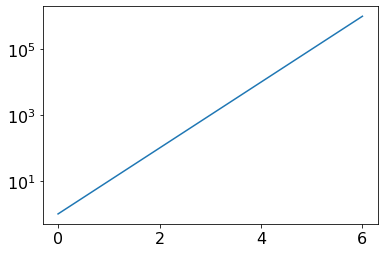

In [32]:
s.plot.line(logy = True)

### Population example
https://ourworldindata.org/grapher/population

In [33]:
populations = pd.Series({
        "China":1439323776,
        "India": 1380004385,
        "Mexico": 128932753,
        "Senegal":16743927,
        "Bahrain":1701575,
        "Grenada":112523,
        "Tuvalu": 11792
})

Plot populations as a bar chart.

<AxesSubplot:>

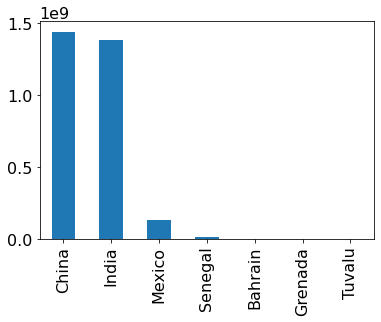

In [34]:
# not that readable
populations.plot.bar()

Now plot on a logarithmic scale.

<AxesSubplot:>

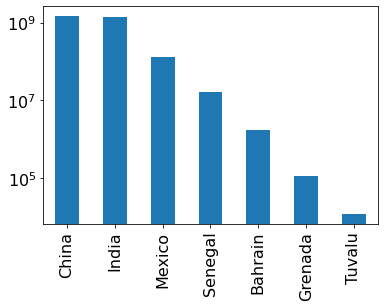

In [35]:
populations.plot.bar(logy = True)

### Multiple *axessubplots* in the same plot

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

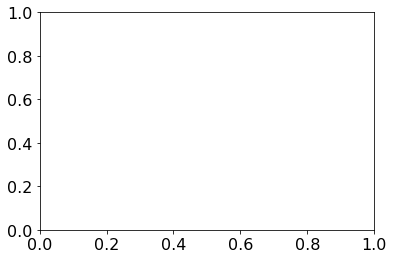

In [36]:
plt.subplots()

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

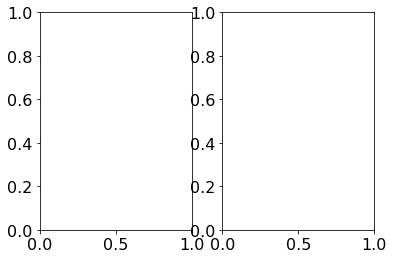

In [37]:
plt.subplots(ncols = 2)

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

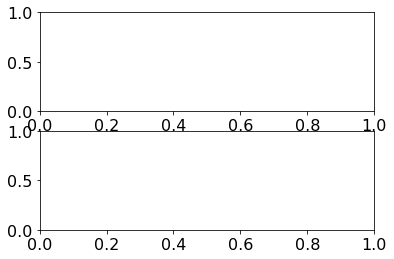

In [38]:
plt.subplots(nrows = 2)

(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

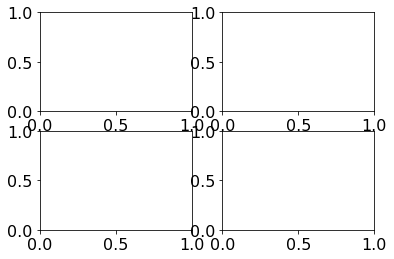

In [39]:
plt.subplots(ncols = 2, nrows = 2)

In [40]:
s1 = Series([1, 2, 3, 3, 4])
s2 = Series([5, 7, 7, 8])

Let's create a single plot with two sub figures (line plots) and plot s1 on the left and s2 on the right.

<AxesSubplot:>

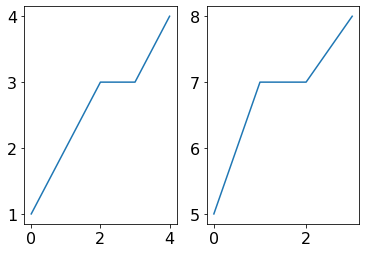

In [41]:
fig, axes = plt.subplots(ncols = 2)
# axes[0] # the area on the left
# axes[1] # the area on the right
s1.plot.line(ax = axes[0])
s2.plot.line(ax = axes[1])

What is wrong with the below plot?

In [42]:
# Y-axes are misleading

# How can we fix that?
- pass argument to `sharey` parameter while invoking subplots function

<AxesSubplot:>

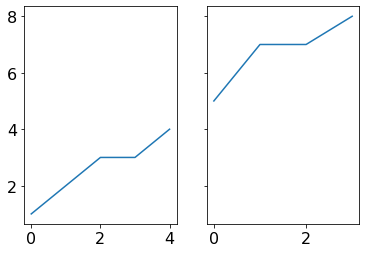

In [43]:
fig, axes = plt.subplots(ncols = 2, sharey = True)
# axes[0] # the area on the left
# axes[1] # the area on the right
pd.Series([1, 2, 3, 3, 4]).plot.line(ax = axes[0])
pd.Series([5, 7, 7, 8]).plot.line(ax = axes[1])

### Iris dataset

In [44]:
# Gather the data.
resp = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
resp.raise_for_status()

iris_f = open("iris.csv", "w")
iris_f.write(resp.text)
iris_f.close()

iris_df = pd.read_csv("iris.csv",
                 names = ["sep-len", "sep-wid", "pet-len", "pet-wid", "class"])
iris_df.head()

,sep-len,sep-wid,pet-len,pet-wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


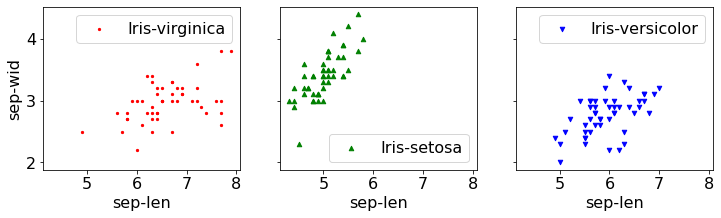

In [45]:
# Plot the sepal length vs the sepal width for each of the classes of flowers.
colors = ["r", "g", "b"]
markers = [".", "^", "v"]

varieties = list(set(iris_df["class"]))

fig, axes = plt.subplots(ncols = 3, sharex = True, sharey = True, figsize=(12,3))
for i in range(len(varieties)):
    variety = varieties[i]
    specific_iris_data = iris_df[iris_df["class"] == variety]
    specific_iris_data.plot.scatter(x = "sep-len", y = 'sep-wid', \
                                    ax = axes[i], color = colors[i], marker = markers[i],
                                   label = variety)

## Self-practice - Student Information Dataset

In [46]:
# TODO: establish connection to "cs220_survey_data.db"
path = "cs220_survey_data.db"
assert os.path.exists(path)
conn = sqlite3.connect(path)

# TODO: determine the table name and column types
print(pd.read_sql("SELECT * FROM sqlite_master WHERE type = 'table'", conn)["sql"].iloc[0])

CREATE TABLE "survey" (
"Lecture" TEXT,
  "Age" REAL,
  "Primary major" TEXT,
  "Other majors" TEXT,
  "Zip Code" TEXT,
  "Pizza topping" TEXT,
  "Pet owner" TEXT,
  "Runner" TEXT,
  "Sleep habit" TEXT,
  "Procrastinator" TEXT
)


In [47]:
# TODO: display all columns of the table
survey_data = pd.read_sql("SELECT * FROM survey", conn)

In [48]:
# TODO: Using pandas read "cs220_survey_data.csv" into a DataFrame called survey

survey = pd.read_csv("cs220_survey_data.csv")

### Create a bar plot of ages.
- x-axis: each unique age
- y-axis: count of students with those ages.

Things to consider:
- Do we really want the ages to be a float value? Make the int conversion.
    - Remember the survey dataset has a few rows where "Age" column has no value - so handle the NA values before the conversion
- Think carefully about how to sort the data before you create the plot.

<AxesSubplot:>

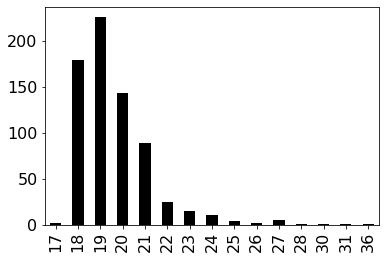

In [49]:
age_counts = survey["Age"].dropna().astype(int).value_counts()
age_counts = age_counts.sort_index()
age_counts.plot.bar(color = "k")

### Write equivalent SQL query to retrive the age column values

In [50]:
ages = pd.read_sql("""
SELECT Age
FROM survey
""", conn)

# If you repeat the bar plot with SQL version of the data, you will see what are called as "MultiIndex" - that is beyond the scope of this course

### Create a bar plot of primary majors.
- x-axis: each major
- y-axis: count of students with those majors.

<AxesSubplot:>

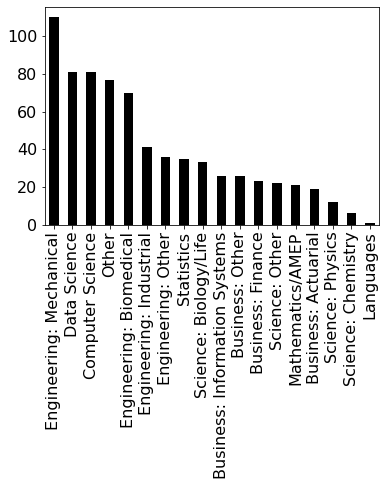

In [51]:
major_counts = survey["Primary major"].value_counts()
major_counts.plot.bar(color = "k")

In [52]:
### Write equivalent SQL query to retrive the Primary major column values

In [53]:
ages = pd.read_sql("""
SELECT `Primary major`
FROM survey
""", conn)

# If you repeat the bar plot with SQL version of the data, you will see what are called as "MultiIndex" - that is beyond the scope of this course

### Create a scatter plot to visualize the corelation between "Age" and "Procrastinator" columns

- "Procrastinator" column has 3 values
- Create a single scatter plot
- You will find that there is absolutely no correlation.

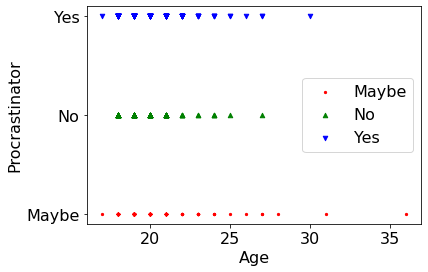

In [54]:
# Plot the sepal length vs the sepal width for each of the classes of flowers.
colors = ["r", "g", "b"]
markers = [".", "^", "v"]

procrastination = list(set(survey["Procrastinator"]))

plot_area = None
for i in range(len(procrastination)):
    curr_procrastination = procrastination[i]
    specific_procrastination_data = survey[survey["Procrastinator"] == curr_procrastination]
    plot_area = specific_procrastination_data.plot.scatter(x = "Age", y = 'Procrastinator', \
                                    ax = plot_area, color = colors[i], marker = markers[i],
                                   label = curr_procrastination)